<a href="https://colab.research.google.com/github/merasifa/MACHINE_LEARNING/blob/main/JS14_TIARA_MERA_SIFA_2341720247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRAKTIKUM 1

Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Langkah 2 - Pra Pengolahan Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive'))
print(os.listdir('/content/drive/MyDrive/ML'))
print(os.listdir('/content/drive/MyDrive/ML/dataset'))


['CamScanner 07-01-2020 20.42.41.pdf', 'IMG20200720101357.jpg', 'Tugas Pd', 'IMG20200112124009.jpg', 'Tugas DDG', 'IMG20200728122955.jpg', 'Tiara Mera S_34_rplc (1).docx', 'TUGAS SIMULASI DIGITAL', 'IMG_20200806_085148_507.jpg', 'Modul 3.docx', 'TUGAS PRA AKSARA 2.gdoc', 'IMG-20200821-WA0003.jpg', 'tiara mera s.pdf', 'IMG_20200824_200837_686.jpg', 'Screenshot_2020-08-24-17-53-42-97 (1).png', 'Screenshot_2020-08-24-20-15-16-31 (1).png', 'Screenshot_2020-08-24-20-15-12-40.png', 'Screenshot_2020-08-24-20-15-07-50.png', 'Screenshot_2020-08-24-17-53-42-97.png', 'Screenshot_2020-08-24-20-15-16-31.png', 'Tugas agama_tiarameras_34.pdf', 'UH Nilai Mutlak RPL.gsheet', 'IMG_20200904_072507_912.jpg', 'IMG-20200904-WA0003.jpg', 'simdig_34_tiara mera s.docx', 'Naskah.gdoc', 'Word1_34_TIARAMERASIFA (1).docx', 'Class_2020_09_15__02_35_QZ_SPtLDV (1).gsheet', 'IMG-20200916-WA0017.jpg', 'simdig_mail merge_34_tiara mera sifa.docx', 'Tugas Anekdot Pertemuan 1.gdoc', 'IMG-20200923-WA0183.jpg', 'Tugas Anekdo

Langkah 2.1. Pra Pengolahan Data Training

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)


In [ ]:
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML/dataset/dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.


Langkah 2.2. Pra Pengolahan Data Testing

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/ML/dataset/dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


Langkah 3 - Pembuatan Model CNN

Langkah 3.1.  - Inisiasi Model CNN

In [ ]:
cnn = tf.keras.models.Sequential()

Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Langkah 3.3 - Pembuatan Layer Pooling 1

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Langkah 3.5 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Langkah 3.6 - Fully Connected Layer 1 (Input)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Langkah 3.7 - Fully Connected Layer 2 (Output)

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Langkah 3.8 - Compile Model CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 4 - Fit CNN

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2019s 8s/step - accuracy: 0.5411 - loss: 0.6969 - val_accuracy: 0.6640 - val_loss: 0.6038
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 111s 444ms/step - accuracy: 0.6744 - loss: 0.5905 - val_accuracy: 0.7390 - val_loss: 0.5329
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 108s 433ms/step - accuracy: 0.7247 - loss: 0.5464 - val_accuracy: 0.7380 - val_loss: 0.5264
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 107s 426ms/step - accuracy: 0.7518 - loss: 0.5033 - val_accuracy: 0.7710 - val_loss: 0.4804
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 109s 436ms/step - accuracy: 0.7759 - loss: 0.4764 - val_accuracy: 0.7535 - val_loss: 0.4948
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 107s 427ms/step - accuracy: 0.7751 - loss: 0.4671 - val_accuracy: 0.7510 - val_loss: 0.5164
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 455ms/step - accuracy: 0.7739 - loss: 0.4604 - val_accuracy: 0.7805 - val_loss: 0.4692
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 420ms/step - accuracy: 0.7933 - l

Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(
    '/content/drive/MyDrive/ML/dataset/dataset/single_prediction/cat_or_dog_1.jpg',
    target_size=(64, 64)
)

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


PRAKTIKUM 2

Langkah 1 - Load Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Langkah 2 - Unduh Dataset CIFAR

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Langkah 3 - Verifikasi Data

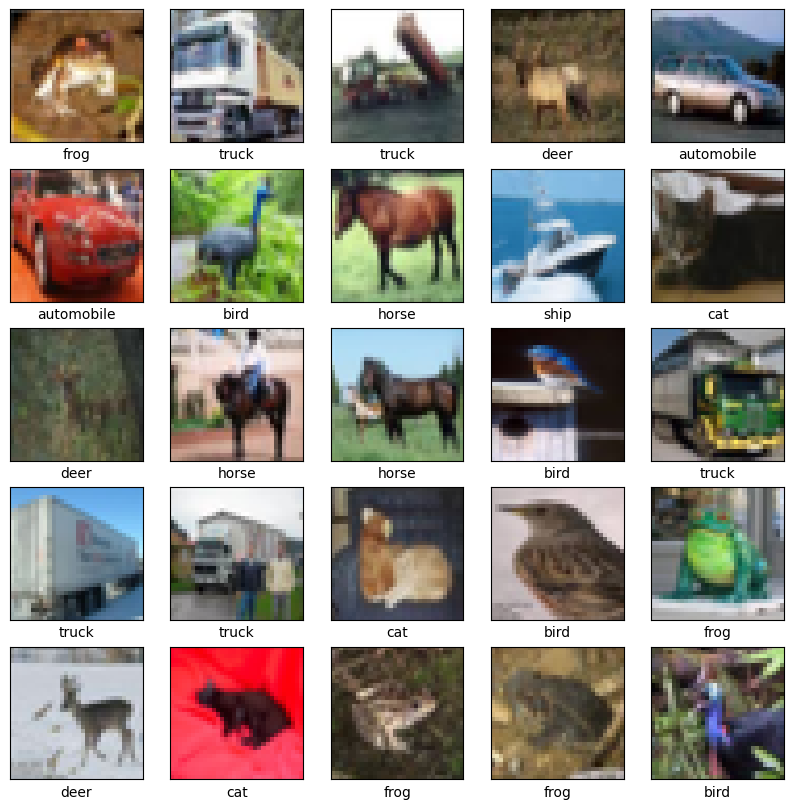

In [ ]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


Langkah 4 - Buat Model CNN

Langkah 4.1. - Buat Layer Konvolusi

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Langkah 4.2. - Cek Arsitektur Konvolusi

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Langkah 4.3. - Tambahkan Layer Fully Connected

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Langkah 4.4. - Cek Arsitektur Model CNN

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Langkah 4.5. - Compile Model CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Langkah 5 - Fit Model

In [ ]:

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3487 - loss: 1.7566 - val_accuracy: 0.5413 - val_loss: 1.2873
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.5743 - loss: 1.1993 - val_accuracy: 0.6191 - val_loss: 1.0929
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 50ms/step - accuracy: 0.6403 - loss: 1.0259 - val_accuracy: 0.6474 - val_loss: 0.9914
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6782 - loss: 0.9176 - val_accuracy: 0.6729 - val_loss: 0.9305
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.7089 - loss: 0.8309 - val_accuracy: 0.6851 - val_loss: 0.9121
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7333 - loss: 0.7581 - val_accuracy: 0.6998 - val_loss: 0.8901
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 55ms/step - accuracy: 0.7495 - loss: 0.7163 - val_accuracy: 0.7116 - val_loss: 0.8605
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7727 

Langkah 6 - Evaluasi Model

313/313 - 4s - 12ms/step - accuracy: 0.7119 - loss: 0.8889


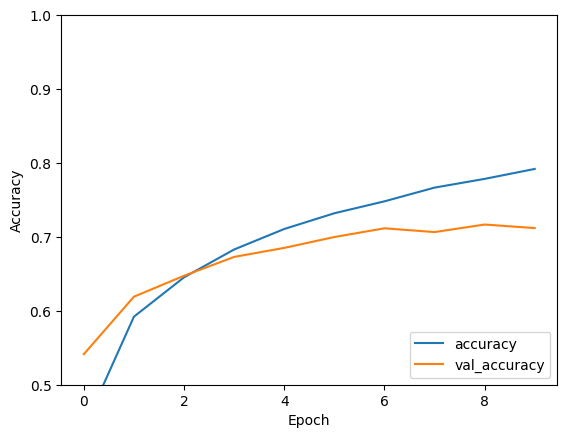

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Langkah 7 - Cetak Hasil Akurasi

In [ ]:
print(test_acc)

0.711899995803833


TUGAS PRAKTIKUM

Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same',
                        input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Block 2
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Block 3
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

# Fully Connected
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,818 (2.55 MB)

 Trainable params: 667,178 (2.55 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(test_images, test_labels)
)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 432s 273ms/step - accuracy: 0.3189 - loss: 1.9778 - val_accuracy: 0.5320 - val_loss: 1.3326
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 434s 278ms/step - accuracy: 0.5162 - loss: 1.3545 - val_accuracy: 0.6616 - val_loss: 0.9681
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 429s 275ms/step - accuracy: 0.6126 - loss: 1.1146 - val_accuracy: 0.6773 - val_loss: 0.9322
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 426s 272ms/step - accuracy: 0.6658 - loss: 0.9785 - val_accuracy: 0.7304 - val_loss: 0.7778
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 430s 275ms/step - accuracy: 0.6921 - loss: 0.8969 - val_accuracy: 0.7385 - val_loss: 0.7606
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 275ms/step - accuracy: 0.7182 - loss: 0.8368 - val_accuracy: 0.7548 - val_loss: 0.7272
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 446s 278ms/step - accuracy: 0.7377 - loss: 0.7693 - val_accuracy: 0.7533 - val_loss: 0.7545
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 427s 273ms/step - ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Akurasi testing:", test_acc)


313/313 - 19s - 62ms/step - accuracy: 0.8339 - loss: 0.5331
Akurasi testing: 0.833899974822998


MODEL CNN UNTUK DATASET MNIST (PER STEP)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs=5,
    validation_data=(test_images, test_labels)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.9106 - loss: 0.2899 - val_accuracy: 0.9799 - val_loss: 0.0575
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9851 - loss: 0.0474 - val_accuracy: 0.9892 - val_loss: 0.0315
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9912 - loss: 0.0292 - val_accuracy: 0.9901 - val_loss: 0.0291
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9895 - val_loss: 0.0331
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.9905 - val_loss: 0.0265


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Akurasi MNIST:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9881 - loss: 0.0338
Akurasi MNIST: 0.9904999732971191
